In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

In [2]:
!wget https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip

--2023-11-12 18:41:07--  https://storage.googleapis.com/tensorflow-1-public/course2/cats_and_dogs_filtered.zip
Resolving storage.googleapis.com (storage.googleapis.com)... 173.194.194.207, 173.194.195.207, 173.194.196.207, ...
Connecting to storage.googleapis.com (storage.googleapis.com)|173.194.194.207|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 68606236 (65M) [application/zip]
Saving to: ‘cats_and_dogs_filtered.zip’

cats_and_dogs_filte 100%[===================>]  65.43M   207MB/s    in 0.3s    

2023-11-12 18:41:08 (207 MB/s) - ‘cats_and_dogs_filtered.zip’ saved [68606236/68606236]



In [3]:
import zipfile
zipref = zipfile.ZipFile("./cats_and_dogs_filtered.zip","r")
zipref.extractall("tmp/")
zipref.close()

In [4]:
!ls -la

total 67032
drwxr-xr-x 3 root root     4096 Nov 12 18:41 .
drwxr-xr-x 6 root root     4096 Nov 12 18:40 ..
---------- 1 root root    18270 Nov 12 18:41 __notebook__.ipynb
-rw-r--r-- 1 root root 68606236 Mar 23  2022 cats_and_dogs_filtered.zip
drwxr-xr-x 3 root root     4096 Nov 12 18:41 tmp


In [5]:
train = "/kaggle/working/tmp/cats_and_dogs_filtered/train"
valid = "/kaggle/working/tmp/cats_and_dogs_filtered/validation"

In [6]:
import tensorflow as tf
import tensorflow.keras as keras
from tensorflow.keras.preprocessing.image import ImageDataGenerator

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [7]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
val_datagen = ImageDataGenerator(rescale=1.0/255)

train_generator = train_datagen.flow_from_directory(train, target_size=(150,150), batch_size=20, class_mode="binary")
val_generator = val_datagen.flow_from_directory(valid, target_size = (150,150), batch_size=20, class_mode = "binary")

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [8]:
model = keras.models.Sequential([
    keras.layers.Conv2D(64,(3,3), activation="relu",input_shape = (150,150, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [9]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=20, validation_data=val_generator)

Epoch 1/20
100/100 [==============================] - 16s 49ms/step - loss: 0.8090 - accuracy: 0.5060 - val_loss: 0.6923 - val_accuracy: 0.5010
Epoch 2/20
100/100 [==============================] - 5s 47ms/step - loss: 0.6948 - accuracy: 0.5015 - val_loss: 0.6923 - val_accuracy: 0.5000
Epoch 3/20
100/100 [==============================] - 5s 47ms/step - loss: 0.6930 - accuracy: 0.5145 - val_loss: 0.6822 - val_accuracy: 0.6070
Epoch 4/20
100/100 [==============================] - 5s 47ms/step - loss: 0.6717 - accuracy: 0.5975 - val_loss: 0.6444 - val_accuracy: 0.6410
Epoch 5/20
100/100 [==============================] - 5s 46ms/step - loss: 0.6324 - accuracy: 0.6410 - val_loss: 0.6240 - val_accuracy: 0.6610
Epoch 6/20
100/100 [==============================] - 5s 48ms/step - loss: 0.5965 - accuracy: 0.6840 - val_loss: 0.6034 - val_accuracy: 0.6900
Epoch 7/20
100/100 [==============================] - 5s 46ms/step - loss: 0.5550 - accuracy: 0.7055 - val_loss: 0.5817 - val_accuracy: 0.669

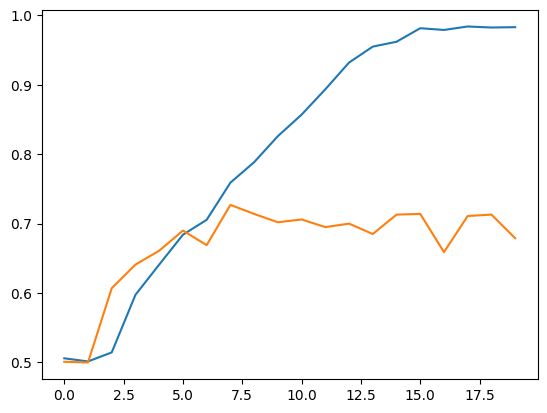

In [10]:
import matplotlib.pyplot as plt
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [11]:
train_datagen = ImageDataGenerator(rescale=1.0/255,
                                   rotation_range=40,
                                   width_shift_range=0.2,
                                   height_shift_range=0.2,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True,
                                   fill_mode='nearest'
                                  )
train_generator = train_datagen.flow_from_directory(train, target_size=(150,150), batch_size=20, class_mode="binary")

Found 2000 images belonging to 2 classes.


In [12]:
history = model.fit(train_generator, steps_per_epoch=100, epochs=50, validation_data=val_generator)

Epoch 1/50
100/100 [==============================] - 14s 137ms/step - loss: 0.7191 - accuracy: 0.6185 - val_loss: 0.5579 - val_accuracy: 0.7400
Epoch 2/50
100/100 [==============================] - 14s 139ms/step - loss: 0.6453 - accuracy: 0.6865 - val_loss: 0.5793 - val_accuracy: 0.6930
Epoch 3/50
100/100 [==============================] - 14s 137ms/step - loss: 0.6107 - accuracy: 0.6800 - val_loss: 0.5702 - val_accuracy: 0.6750
Epoch 4/50
100/100 [==============================] - 13s 135ms/step - loss: 0.5986 - accuracy: 0.6865 - val_loss: 0.5157 - val_accuracy: 0.7490
Epoch 5/50
100/100 [==============================] - 14s 139ms/step - loss: 0.5800 - accuracy: 0.7085 - val_loss: 0.5051 - val_accuracy: 0.7410
Epoch 6/50
100/100 [==============================] - 14s 137ms/step - loss: 0.5642 - accuracy: 0.7205 - val_loss: 0.5296 - val_accuracy: 0.7280
Epoch 7/50
100/100 [==============================] - 14s 138ms/step - loss: 0.5630 - accuracy: 0.7215 - val_loss: 0.6096 - val_ac

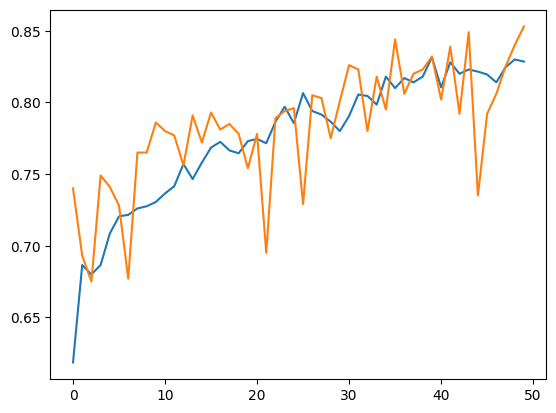

In [13]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

In [14]:
model = keras.models.Sequential([
    keras.layers.RandomRotation(factor=(-0.4,0.4), fill_mode="nearest"),
    keras.layers.RandomFlip(mode="horizontal"),
    keras.layers.RandomZoom(height_factor=(0.2,0.3), width_factor=(0.2,0.3),fill_mode="nearest"),
    keras.layers.Conv2D(64,(3,3), activation="relu",input_shape = (150,150, 3)),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(64,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Conv2D(128,(3,3), activation="relu"),
    keras.layers.MaxPooling2D(2,2),
    keras.layers.Flatten(),
    keras.layers.Dense(512,activation="relu"),
    keras.layers.Dense(1,activation="sigmoid")
])
model.compile(optimizer="rmsprop", loss="binary_crossentropy", metrics=["accuracy"])

In [15]:
train_datagen = ImageDataGenerator(rescale=1.0/255)
train_generator = train_datagen.flow_from_directory(train, target_size=(150,150), batch_size=20, class_mode="binary")

history = model.fit(train_generator, steps_per_epoch=100, epochs=50, 
                    validation_data=val_generator, validation_steps=50)

Found 2000 images belonging to 2 classes.
Epoch 1/50
100/100 [==============================] - 7s 49ms/step - loss: 0.6959 - accuracy: 0.5200 - val_loss: 0.6942 - val_accuracy: 0.5000
Epoch 2/50
100/100 [==============================] - 5s 47ms/step - loss: 0.6951 - accuracy: 0.5050 - val_loss: 0.6918 - val_accuracy: 0.5160
Epoch 3/50
100/100 [==============================] - 5s 48ms/step - loss: 0.6922 - accuracy: 0.5210 - val_loss: 0.6787 - val_accuracy: 0.5980
Epoch 4/50
100/100 [==============================] - 5s 46ms/step - loss: 0.6892 - accuracy: 0.5970 - val_loss: 0.6631 - val_accuracy: 0.6190
Epoch 5/50
100/100 [==============================] - 5s 48ms/step - loss: 0.6525 - accuracy: 0.6190 - val_loss: 0.6430 - val_accuracy: 0.6250
Epoch 6/50
100/100 [==============================] - 5s 46ms/step - loss: 0.6401 - accuracy: 0.6360 - val_loss: 0.6130 - val_accuracy: 0.6450
Epoch 7/50
100/100 [==============================] - 5s 47ms/step - loss: 0.6217 - accuracy: 0.6575

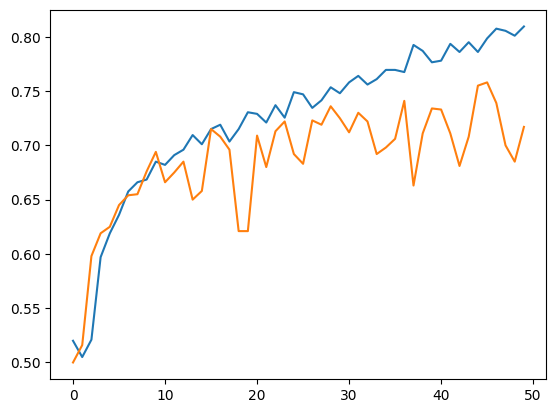

In [16]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])